In [2]:
#1) Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
#View setting
pd.set_option('display.max_rows', 1000)

In [54]:
#2) Importing data sets 
appln_data= pd.read_csv('application_data.csv') # application data
pre_appln_data= pd.read_csv('previous_application.csv') # Previous application data

In [6]:
appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
appln_data.shape

(47151, 122)

In [8]:
appln_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47151 entries, 0 to 47150
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(63), int64(43), object(16)
memory usage: 43.9+ MB


In [9]:
appln_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,47151.000000,47151.000000,47151.000000,4.715100e+04,4.715100e+04,47151.000000,4.715100e+04,47151.000000,47151.000000,47151.000000,...,47151.000000,47151.000000,47151.000000,47151.000000,47133.000000,47133.000000,47133.000000,47133.000000,47133.000000,47133.000000
mean,428179.370427,0.078959,0.417404,1.686382e+05,6.005510e+05,27114.000954,5.400871e+05,0.020958,-16013.011580,63163.599457,...,0.009035,0.000721,0.000742,0.000276,0.005919,0.006683,0.032504,0.270257,0.259288,1.880275
std,19705.926674,0.269678,0.722962,1.001564e+05,4.046380e+05,14509.205143,3.714872e+05,0.013927,4337.340941,140721.761441,...,0.094622,0.026844,0.027235,0.016602,0.078352,0.102055,0.193800,0.935902,0.606029,1.869294
min,100002.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415500.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,-19636.500000,-2736.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,428826.000000,0.000000,0.000000,1.485000e+05,5.179275e+05,24930.000000,4.500000e+05,0.018850,-15731.000000,-1218.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,442611.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34573.500000,6.795000e+05,0.028663,-12410.000000,-295.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,4.500000e+06,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7686.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,8.000000,22.000000,8.000000,20.000000


In [10]:
appln_data.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                     3678
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [56]:
appln_data.isna().mean().sort_values(ascending=False)*100

COMMONAREA_MEDI                 10.712392
COMMONAREA_AVG                  10.712392
COMMONAREA_MODE                 10.712392
NONLIVINGAPARTMENTS_MODE        10.320036
NONLIVINGAPARTMENTS_MEDI        10.320036
NONLIVINGAPARTMENTS_AVG         10.320036
FONDKAPREMONT_MODE               9.429280
LIVINGAPARTMENTS_MEDI            9.393226
LIVINGAPARTMENTS_MODE            9.393226
LIVINGAPARTMENTS_AVG             9.393226
FLOORSMIN_MEDI                   9.062374
FLOORSMIN_MODE                   9.062374
FLOORSMIN_AVG                    9.062374
YEARS_BUILD_MEDI                 8.059214
YEARS_BUILD_AVG                  8.059214
YEARS_BUILD_MODE                 8.059214
OWN_CAR_AGE                      7.800471
LANDAREA_MODE                    4.254417
LANDAREA_AVG                     4.254417
LANDAREA_MEDI                    4.254417
BASEMENTAREA_MEDI                3.932048
BASEMENTAREA_AVG                 3.932048
BASEMENTAREA_MODE                3.932048
EXT_SOURCE_1                     3

In [34]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [11]:
import missingno as mn

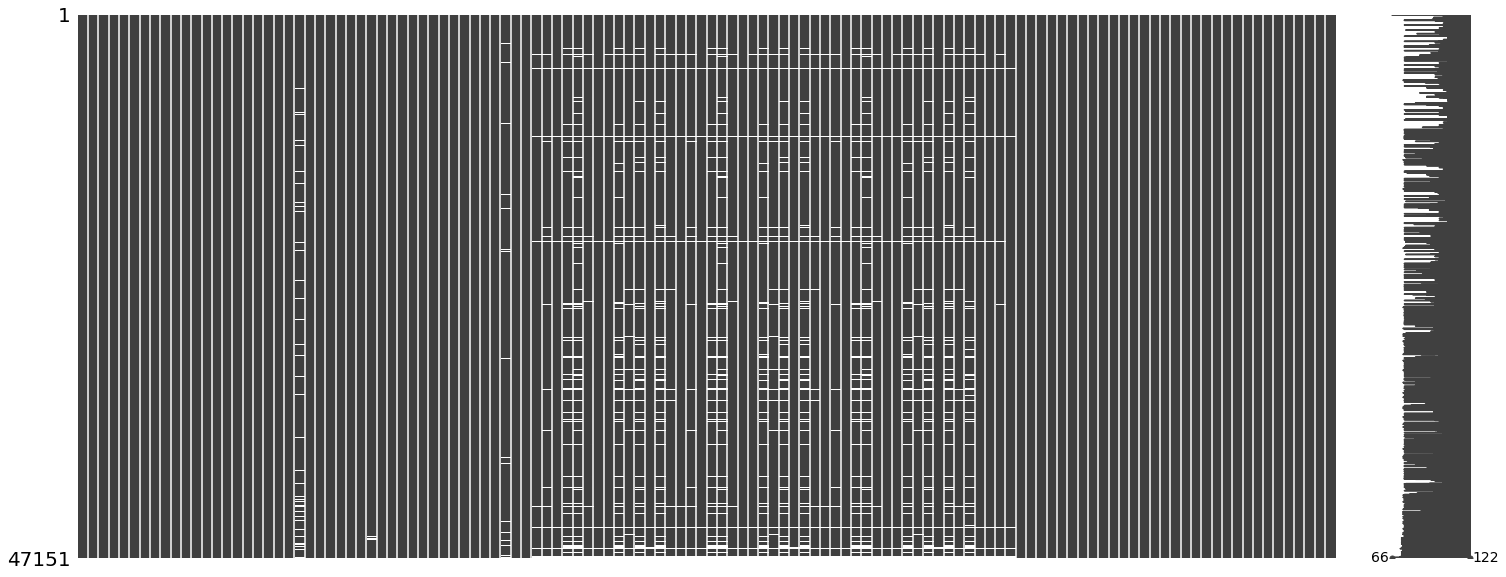

In [12]:
mn.matrix(appln_data)

In [13]:
appln_data.groupby('OCCUPATION_TYPE').OCCUPATION_TYPE.count().sort_values(ascending=False)

OCCUPATION_TYPE
Laborers                 12233
Sales staff               7256
Core staff                6104
Managers                  4706
Drivers                   4107
High skill tech staff     2591
Accountants               2184
Medicine staff            1895
Security staff            1473
Cooking staff             1307
Cleaning staff            1063
Private service staff      593
Low-skill Laborers         465
Waiters/barmen staff       305
Secretaries                287
Realty agents              172
HR staff                   141
IT staff                   121
Name: OCCUPATION_TYPE, dtype: int64

In [57]:
appln_data['OCCUPATION_TYPE'].mode()[0]
appln_data['OCCUPATION_TYPE']=appln_data['OCCUPATION_TYPE'].fillna(appln_data['OCCUPATION_TYPE'].mode()[0])

In [58]:
# Continous columns: replacing with Median
for i in ['EXT_SOURCE_1', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']:
    appln_data[i]=appln_data[i].fillna(appln_data[i].median())
    
# Creating the 'TARGET_PERCENT' Column. Multiplying 'TARGET' column by 100.
appln_data['TARGET_PERCENT']=appln_data['TARGET'].apply(lambda x:100 if x==1 else 0)
aappln_data1=appln_data.copy()

In [16]:
appln_data.isna().mean().sort_values(ascending=False)*100

COMMONAREA_AVG                  10.712392
COMMONAREA_MODE                 10.712392
COMMONAREA_MEDI                 10.712392
NONLIVINGAPARTMENTS_AVG         10.320036
NONLIVINGAPARTMENTS_MODE        10.320036
NONLIVINGAPARTMENTS_MEDI        10.320036
FONDKAPREMONT_MODE               9.429280
LIVINGAPARTMENTS_AVG             9.393226
LIVINGAPARTMENTS_MODE            9.393226
LIVINGAPARTMENTS_MEDI            9.393226
FLOORSMIN_MEDI                   9.062374
FLOORSMIN_AVG                    9.062374
FLOORSMIN_MODE                   9.062374
YEARS_BUILD_AVG                  8.059214
YEARS_BUILD_MEDI                 8.059214
YEARS_BUILD_MODE                 8.059214
OWN_CAR_AGE                      7.800471
LANDAREA_MODE                    4.254417
LANDAREA_MEDI                    4.254417
LANDAREA_AVG                     4.254417
BASEMENTAREA_MODE                3.932048
BASEMENTAREA_MEDI                3.932048
BASEMENTAREA_AVG                 3.932048
NONLIVINGAREA_MEDI               2

In [17]:
appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_PERCENT
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,100
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [59]:
appln_data['NO_CONTACT_INFO']=appln_data[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']].sum(axis=1)
appln_data=appln_data.drop(columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'])

In [19]:
appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_PERCENT,NO_CONTACT_INFO
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,100,4
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,5
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,3
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3


In [61]:
appln_data['CLIENT_REGION_RATING']=appln_data[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].mean(axis=1)
appln_data=appln_data.drop(columns=['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'])

KeyError: "None of [Index(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'], dtype='object')] are in the [columns]"

In [21]:
appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_PERCENT,NO_CONTACT_INFO,CLIENT_REGION_RATING
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,100,4,2.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,4,1.0
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2.0
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0,3,2.0
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,2.0


In [62]:
appln_data['PERCENTAGE_ADDRESS_MATCH']=(appln_data[['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']].mean(axis=1))*100
appln_data['PERCENTAGE_ADDRESS_MATCH']=100-appln_data['PERCENTAGE_ADDRESS_MATCH']
appln_data=appln_data.drop(columns=['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'])

In [23]:
appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_PERCENT,NO_CONTACT_INFO,CLIENT_REGION_RATING,PERCENTAGE_ADDRESS_MATCH
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,100,4,2.0,100.000000
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0,4,1.0,100.000000
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,2.0,100.000000
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0,3,2.0,100.000000
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3,2.0,66.666667


In [63]:
appln_data['EXT_SOURCE']=appln_data[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
appln_data=appln_data.drop(columns=['EXT_SOURCE_2', 'EXT_SOURCE_3'])

In [25]:
appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_PERCENT,NO_CONTACT_INFO,CLIENT_REGION_RATING,PERCENTAGE_ADDRESS_MATCH,EXT_SOURCE
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,100,4,2.0,100.000000,0.201162
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0,4,1.0,100.000000,0.579658
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0,5,2.0,100.000000,0.642739
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,1.0,0,3,2.0,100.000000,0.593756
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0,3,2.0,66.666667,0.429904


In [64]:
FLAG_DOCUMENTS=list(appln_data.columns)[31:51]
appln_data['TOTAL_DOC_GIVEN']=appln_data[FLAG_DOCUMENTS].sum(axis=1)
appln_data=appln_data.drop(columns=FLAG_DOCUMENTS)

In [27]:
appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_PERCENT,NO_CONTACT_INFO,CLIENT_REGION_RATING,PERCENTAGE_ADDRESS_MATCH,EXT_SOURCE,TOTAL_DOC_GIVEN
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,100,4,2.0,100.000000,0.201162,2.9484
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0,4,1.0,100.000000,0.579658,4.4800
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0,5,2.0,100.000000,0.642739,0.0000
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,0,3,2.0,100.000000,0.593756,0.0000
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0,3,2.0,66.666667,0.429904,0.0000


In [81]:
#Converting the Age in Negative Days to Positive Years in 'DAYS_BIRTH' column
appln_data['AGE']=(round(appln_data['DAYS_BIRTH']/365))*-1
appln_data=appln_data.drop(columns=['DAYS_BIRTH'])

KeyError: 'DAYS_BIRTH'

In [82]:
appln_data['AGE']

0        20-30
1        40-50
2        50-60
3        50-60
4        50-60
         ...  
47146    50-60
47147    30-40
47148    20-30
47149    50-60
47150    50-60
Name: AGE, Length: 47151, dtype: category
Categories (5, object): [20-30 < 30-40 < 40-50 < 50-60 < 60+]

In [67]:
#Converting the Negative Values of 'DAYS_REGISTRATION' to Positive
appln_data['DAYS_REGISTRATION']=appln_data['DAYS_REGISTRATION'].apply(lambda x:x*-1)

In [68]:
#Converting the negative values of 'DAYS_LAST_PHONE_CHANGE' to Positive
appln_data['DAYS_LAST_PHONE_CHANGE']=appln_data['DAYS_LAST_PHONE_CHANGE'].apply(lambda x:x*-1)

In [ ]:
#Creating the column 'Repayer_or_Defaulter'
#0 from TARGET column as Repayers & 1 from TARGET column as Defaulters

In [69]:
appln_data['Repayer_or_Defaulter']=appln_data['TARGET'].apply(lambda x:'Repayer' if x==0 else 'Defaulter')

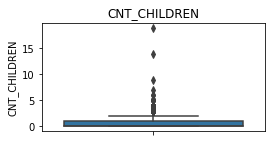

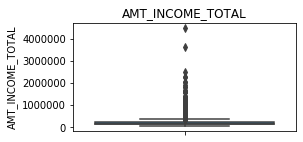

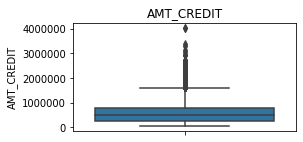

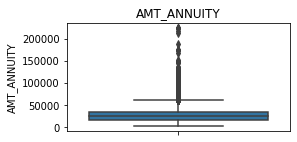

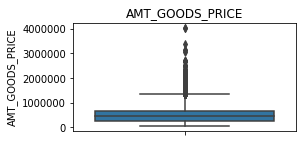

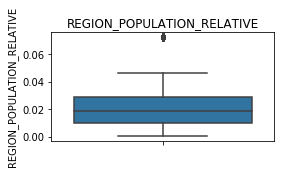

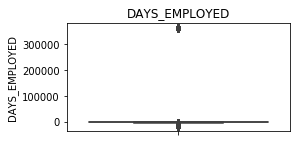

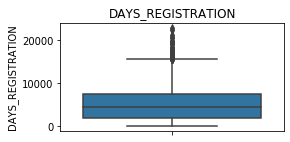

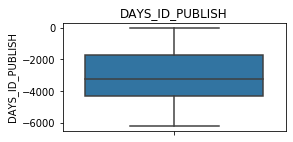

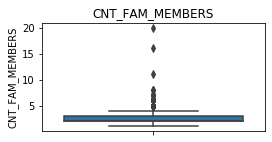

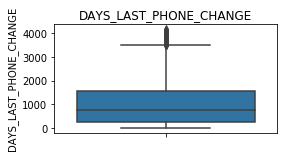

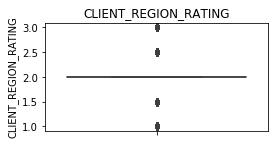

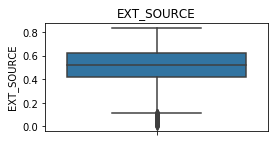

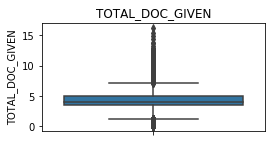

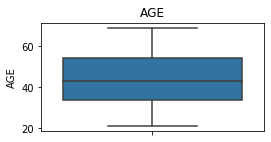

In [70]:
#Outlier Check by using Box plot
appln_data_continous = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'CLIENT_REGION_RATING', 'EXT_SOURCE', 'TOTAL_DOC_GIVEN', 'AGE']
appln_data_categorical=['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NO_CONTACT_INFO', 'PERCENTAGE_ADDRESS_MATCH']
j=1
for i in appln_data_continous:
    plt.figure(figsize=(4,2))
    sns.boxplot(y=appln_data[i])
    plt.title(i)
    plt.show()

In [ ]:
#Insights:-
#1) CNT_CHILDREN:- Few applicants have more than 2-4 children which are outliers in this case
#2) AMT_INCOME_TOTAL:- Few applicants/clients are having very high income
#3) AMT_CREDIT:- Few applicants are asking for high loan credit (AMT_CREDIT) because of higher value of AMT_GOODS_PRICE
#4) AMT_ANNUITY:- As there are clients who are asking for high AMT_CREDIT, Amount of anual repayment also goes high
#5) AMT_GOODS_PRICE:- Few clients are applying for high goods price
#6) REGION_POPULATION_RELATIVE:- No much outliers
#7) DAYS_EMPLOYED:- Some outliers beyond 350000 days which can be considered as ERROR
#8) DAYS_REGISTRATION:- There are outliers which are still valid
#9) CNT_FAM_MEMBERS:- Few clients have family members more than 5
#10) DAYS_LAST_PHONE_CHANGE:- There are outliers which are still valid
#11) CLIENT_REGION_RATING:- Few of the clients have very good rating and very less rating at the same time. Not strong insight.
#12) EXT_SOURCE:- Few clients have very less normalized score from external source
#13)  TOTAL_DOC_GIVEN:- Majority of the clients have given single document only. Few have given more than 1 or not given at all.
#14) AGE:- No outliers in AGE column

In [71]:
# Ratio of Repayers to Defaulters
di=(appln_data['Repayer_or_Defaulter'].value_counts(normalize=True)*100)
di[0]/di[1]

11.664786462530218

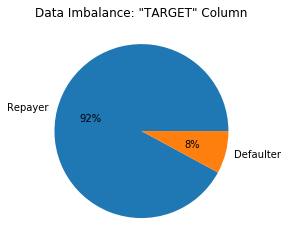

In [72]:
plt.pie(di, labels= di.index, autopct='%.0f%%')
plt.title('Data Imbalance: "TARGET" Column')
plt.show()

In [ ]:
#Here 91.92% of the clients are Repayers and 8.07% of the clients are Defaulters
#Ratio of Repayers (0) to Defaulters (1) is 11.4:1

In [ ]:
#Univariate Analysis target: TARGET column

In [73]:
def appln_data_univariate_categorical(x):
    chart1=pd.DataFrame(appln_data[x].value_counts())
    chart1=chart1.rename(columns={x: 'Value_Counts'})
    defaulters=appln_data.groupby(x).sum()['TARGET']
    chart=pd.concat([chart1,defaulters], axis=1)
    chart=chart.rename(columns={'TARGET': 'Defaulters'})
    chart['Percentage_Defaulters']=(chart['Defaulters']/chart['Value_Counts'])*100
    chart=chart.drop(columns=['Value_Counts', 'Defaulters'])
    chart.index.name=x
    chart=chart.reset_index()
    chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.barplot(data=chart, x=x, y='Percentage_Defaulters', color='Red')
    plt.title('% of Defaulters in each category '+'('+x+')')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,2)
    sns.countplot(appln_data[x], hue=appln_data['Repayer_or_Defaulter'], palette=['Red', 'Green'])
    plt.title(x)
    plt.show()

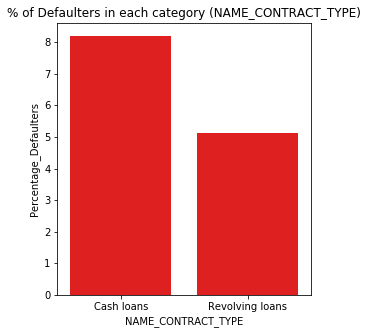

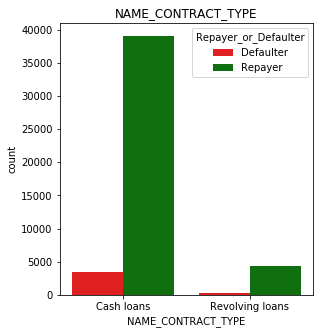

In [74]:
#NAME_CONTRACT_TYPE
appln_data_univariate_categorical('NAME_CONTRACT_TYPE')

In [ ]:
##Insights
#1)More than 8% of the clients under cash loans are defaulters, whereas >5% of the clients under revolving loans are defaulters
#2)Less risk is associated with revolving loans type

In [75]:
appln_data['CODE_GENDER']

0          Male
1        Female
2          Male
3        Female
4          Male
          ...  
47146      Male
47147    Female
47148    Female
47149    Female
47150    Female
Name: CODE_GENDER, Length: 47151, dtype: object

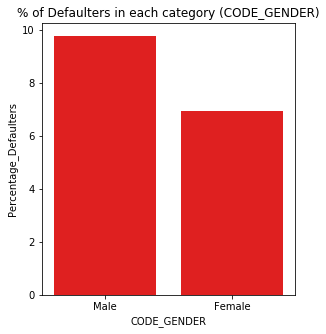

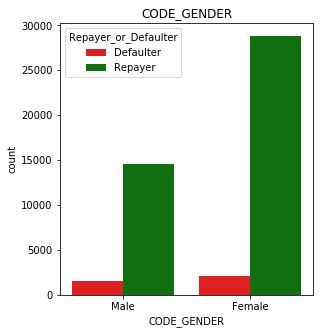

In [77]:
appln_data_univariate_categorical('CODE_GENDER')

In [ ]:
#Insigits:-
#10% of the male clients are defaulters and 7% of the female clients are defaulters
#Less risk is associated with female clients

In [83]:
#AGE
appln_data[appln_data['AGE'] < 20] #No clients whose age is less than 20 years
appln_data['AGE']=pd.cut(appln_data['AGE'], [20,30,40,50,60,999], labels=['20-30', '30-40', '40-50', '50-60', '60+'])
appln_data_univariate_categorical('AGE')

TypeError: Cannot compare a Categorical for op __lt__ with a scalar, which is not a category.

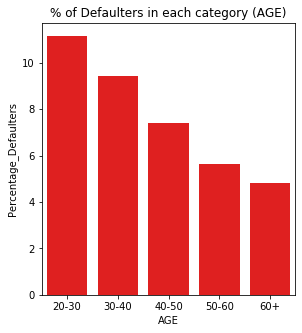

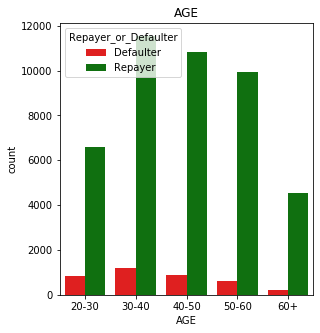

In [84]:
appln_data_univariate_categorical('AGE')

In [ ]:
## Insigits:-
#1)10% of the 20-40 age group clients are defaulters, 7% of the 40-60 age group clients are defaulters and 5% of 60+ age groups are defaulters
#2)More the age of the client, less is the defaulting rate
#3)Less risk is associated with older people

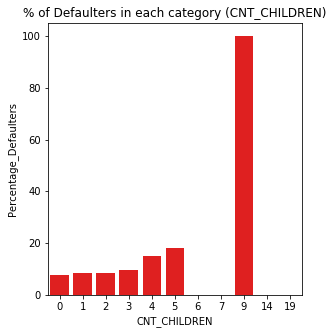

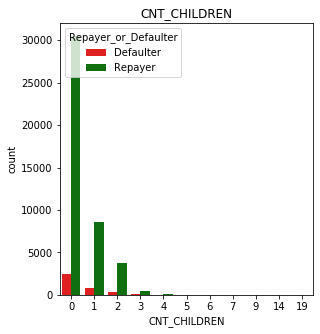

In [85]:
appln_data_univariate_categorical('CNT_CHILDREN')

In [ ]:
#Insigits:-
#1)Clients with children <=3 have less defaulters (<=10%)
#2)Not strong insights, as less data is available for children more than 5

In [88]:
appln_data['AMT_INCOME_TOTAL'].describe()
appln_data['AMT_INCOME_TOTAL']=pd.cut(appln_data['AMT_INCOME_TOTAL'], [0,100000,200000,300000,9999999999], labels=['<1L', '1L-2L', '2L-3L', '3L+'])


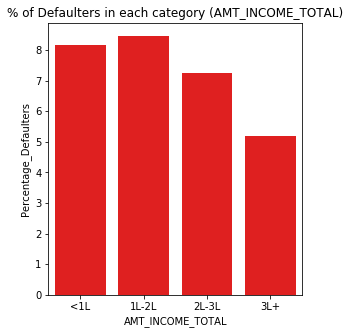

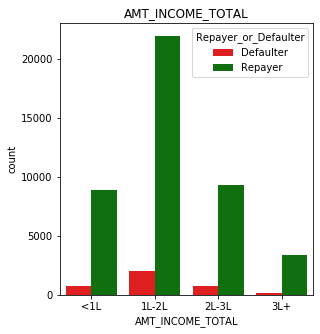

In [89]:
appln_data_univariate_categorical('AMT_INCOME_TOTAL')


In [ ]:
#Insights:-
#1)Clients having total income more than 3 Lakhs have less defaulting rate (less risk associated)
#2)Clients having total income less than 2 Lakhs have more defaulting rate
#3)More the income less is the defaulting rate of the clients

In [90]:
appln_data['FLAG_OWN_CAR']=appln_data['FLAG_OWN_CAR'].apply(lambda x:'Yes' if x=='Y' else 'No')


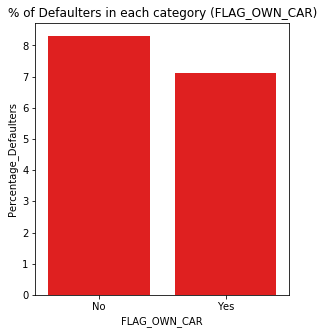

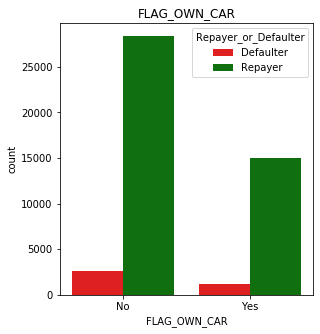

In [91]:
appln_data_univariate_categorical('FLAG_OWN_CAR')

In [ ]:
#Insigits:-¶
#1)More than 8% of clients without car are defaulters and 7% of clents with car are defaulters
#2)No strong insights from this as there is not much difference

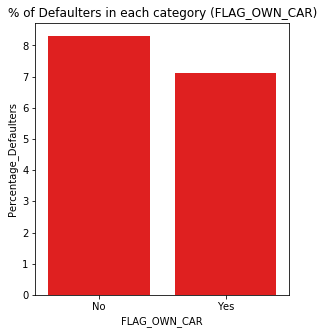

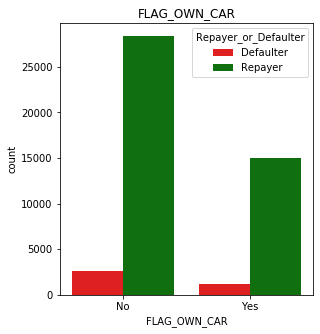

In [92]:
appln_data['FLAG_OWN_REALTY']=appln_data['FLAG_OWN_REALTY'].apply(lambda x:'Yes' if x=='Y' else 'No')
appln_data_univariate_categorical('FLAG_OWN_CAR')

In [ ]:
#Insigits:-
#1)More than 8% of clients without House/Flat are defaulters and 7% of clents with House/Flat are defaulters
#2)No strong insights from this as there is not much difference

In [ ]:
#NAME_INCOME_TYPE

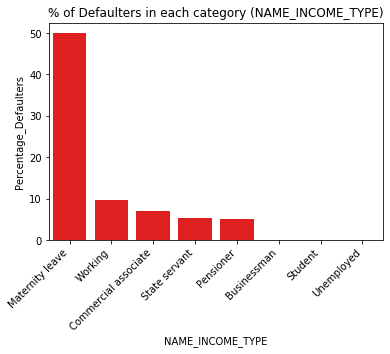

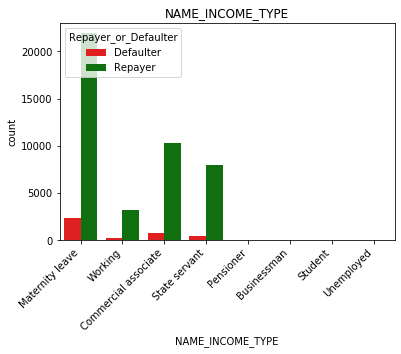

In [93]:
chart1=pd.DataFrame(appln_data['NAME_INCOME_TYPE'].value_counts()).rename(columns={'NAME_INCOME_TYPE': 'Value_Counts'})
defaulters=appln_data.groupby('NAME_INCOME_TYPE').sum()['TARGET']
chart=pd.concat([chart1,defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters']=(chart['Defaulters']/chart['Value_Counts'])*100
chart=chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name='NAME_INCOME_TYPE'
chart=chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)
a=sns.barplot(data=chart, x='NAME_INCOME_TYPE', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('% of Defaulters in each category '+'(NAME_INCOME_TYPE)')
plt.show()
b=sns.countplot(appln_data['NAME_INCOME_TYPE'], hue=appln_data['Repayer_or_Defaulter'], palette=['Red', 'Green'])
b.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('NAME_INCOME_TYPE')
plt.show()

In [ ]:
#Insigits:-
#1)Very high % of defaulters in 'Maternity Leave' category. But the counts are very less, so can be ignored.
#2)Working professionals and commercial associates have litter higher default rate
#3)Pensioners and State Servants has less default rate comparatively (Less risk with them)

In [ ]:
#NAME_EDUCATION_TYPE

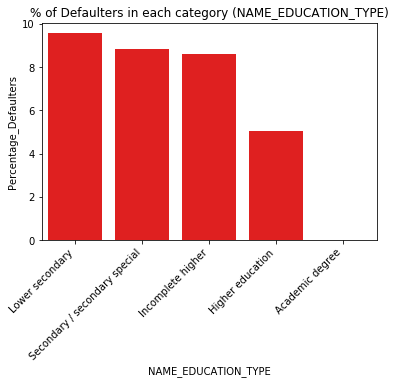

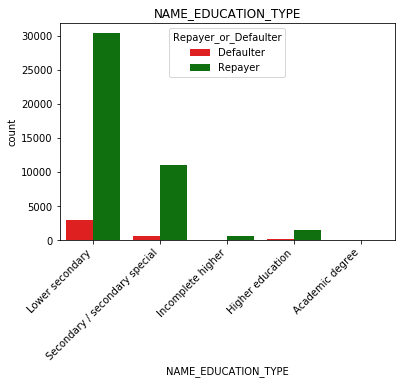

In [94]:
chart1=pd.DataFrame(appln_data['NAME_EDUCATION_TYPE'].value_counts()).rename(columns={'NAME_EDUCATION_TYPE': 'Value_Counts'})
defaulters=appln_data.groupby('NAME_EDUCATION_TYPE').sum()['TARGET']
chart=pd.concat([chart1,defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters']=(chart['Defaulters']/chart['Value_Counts'])*100
chart=chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name='NAME_EDUCATION_TYPE'
chart=chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)
a=sns.barplot(data=chart, x='NAME_EDUCATION_TYPE', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('% of Defaulters in each category '+'(NAME_EDUCATION_TYPE)')
plt.show()
b=sns.countplot(appln_data['NAME_EDUCATION_TYPE'], hue=appln_data['Repayer_or_Defaulter'], palette=['Red', 'Green'])
b.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('NAME_EDUCATION_TYPE')
plt.show()

In [ ]:
#Insigits:-
#1)Clients have higher default rate who have lower secondary, secondary special or Incomplete higher education type
#2)Clients with Academic degree or Higher education tend to default less
#3)Less risk associated is with Academic degree and Higher education holders

In [ ]:
#NAME_FAMILY_STATUS

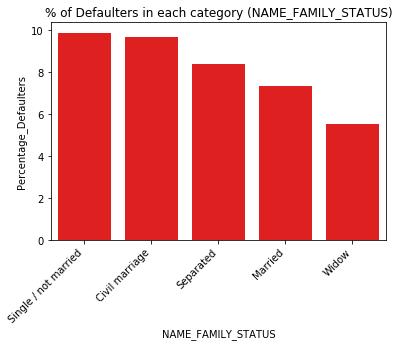

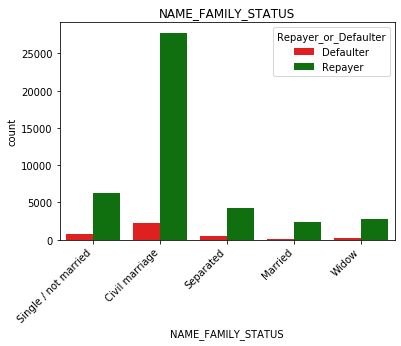

In [95]:
chart1=pd.DataFrame(appln_data['NAME_FAMILY_STATUS'].value_counts()).rename(columns={'NAME_FAMILY_STATUS': 'Value_Counts'})
defaulters=appln_data.groupby('NAME_FAMILY_STATUS').sum()['TARGET']
chart=pd.concat([chart1,defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters']=(chart['Defaulters']/chart['Value_Counts'])*100
chart=chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name='NAME_FAMILY_STATUS'
chart=chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)
a=sns.barplot(data=chart, x='NAME_FAMILY_STATUS', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('% of Defaulters in each category '+'(NAME_FAMILY_STATUS)')
plt.show()
b=sns.countplot(appln_data['NAME_FAMILY_STATUS'], hue=appln_data['Repayer_or_Defaulter'], palette=['Red', 'Green'])
b.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('NAME_FAMILY_STATUS')
plt.show()

In [ ]:
#Insigits:-
#1)Single and Civil married clients have more defaulting rate
#2)Clients who are Widow have less defaulting rate (Less risk), Married clients are also in the acceptable range (6-8%)

In [ ]:
#NAME_HOUSING_TYPE

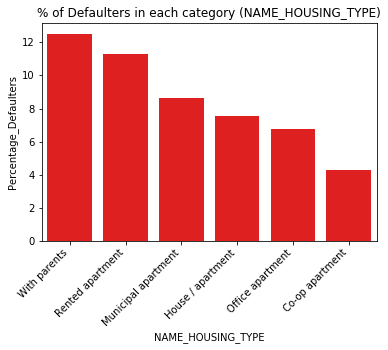

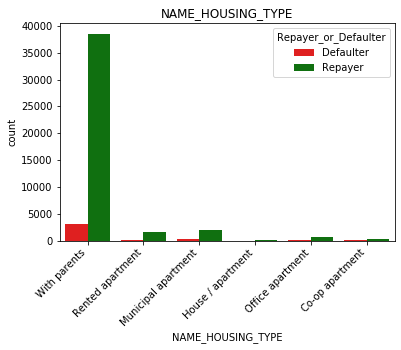

In [97]:
chart1=pd.DataFrame(appln_data['NAME_HOUSING_TYPE'].value_counts()).rename(columns={'NAME_HOUSING_TYPE': 'Value_Counts'})
defaulters=appln_data.groupby('NAME_HOUSING_TYPE').sum()['TARGET']
chart=pd.concat([chart1,defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters']=(chart['Defaulters']/chart['Value_Counts'])*100
chart=chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name='NAME_HOUSING_TYPE'
chart=chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)
a=sns.barplot(data=chart, x='NAME_HOUSING_TYPE', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('% of Defaulters in each category '+'(NAME_HOUSING_TYPE)')
plt.show()
b=sns.countplot(appln_data['NAME_HOUSING_TYPE'], hue=appln_data['Repayer_or_Defaulter'], palette=['Red', 'Green'])
b.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('NAME_HOUSING_TYPE')
plt.show()

In [ ]:
#Insigits:-
#1)Clients living in Rented apartments or With parents have higher defaulting rate
#2)Clients living in Office apartments (Less counts) or owning a House/apartment have less defaulting rate (less risk associated)

In [ ]:
#OCCUPATION_TYPE

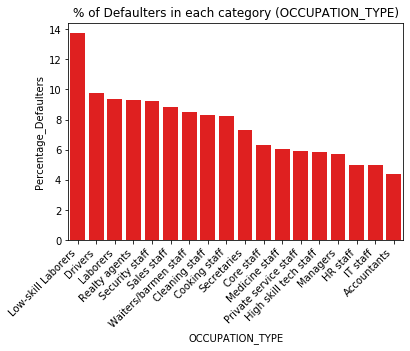

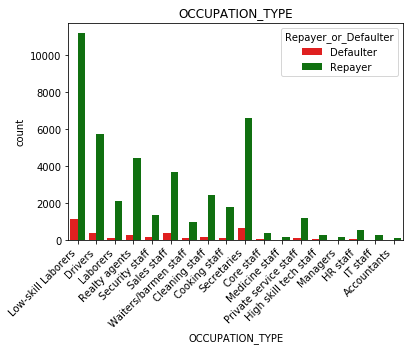

In [98]:
chart1=pd.DataFrame(appln_data['OCCUPATION_TYPE'].value_counts()).rename(columns={'OCCUPATION_TYPE': 'Value_Counts'})
defaulters=appln_data.groupby('OCCUPATION_TYPE').sum()['TARGET']
chart=pd.concat([chart1,defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters']=(chart['Defaulters']/chart['Value_Counts'])*100
chart=chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name='OCCUPATION_TYPE'
chart=chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)
a=sns.barplot(data=chart, x='OCCUPATION_TYPE', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('% of Defaulters in each category '+'(OCCUPATION_TYPE)')
plt.show()
b=sns.countplot(appln_data['OCCUPATION_TYPE'], hue=appln_data['Repayer_or_Defaulter'], palette=['Red', 'Green'])
b.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('OCCUPATION_TYPE')
plt.show()

In [ ]:
#Insigits:-
#1)Sales staffs, Drivers, Security staffs, Cooking staffs, low-skill Laborers (Very high), Waiters/barmen staffs have high defaulting rate
#2)Core staffs, Managers, High skill tech staffs, Accountants, Medicines, Private service, Seceretaries, HR & IT staffs have less defaulting rate (Less risk associated)
#3)Others are in the acceptable range (7.5-9)

In [ ]:
#ORGANIZATION_TYPE

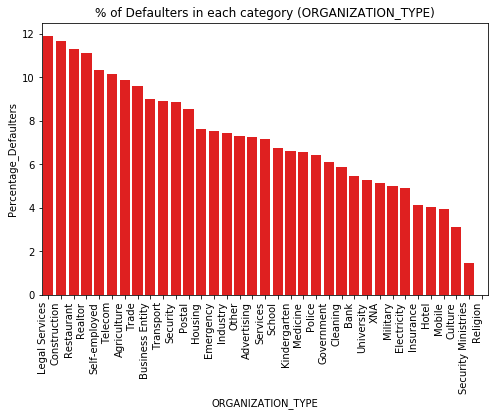

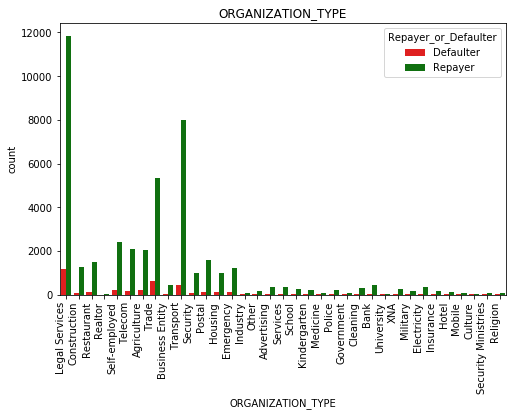

In [100]:
appln_data['ORGANIZATION_TYPE']=appln_data['ORGANIZATION_TYPE'].apply(lambda x:'Industry' if 'Industry' in x else x)
appln_data['ORGANIZATION_TYPE']=appln_data['ORGANIZATION_TYPE'].apply(lambda x:'Transport' if 'Transport' in x else x)
appln_data['ORGANIZATION_TYPE']=appln_data['ORGANIZATION_TYPE'].apply(lambda x:'Trade' if 'Trade' in x else x)
appln_data['ORGANIZATION_TYPE']=appln_data['ORGANIZATION_TYPE'].apply(lambda x:'Business Entity' if 'Business' in x else x)
chart1=pd.DataFrame(appln_data['ORGANIZATION_TYPE'].value_counts()).rename(columns={'ORGANIZATION_TYPE': 'Value_Counts'})
defaulters=appln_data.groupby('ORGANIZATION_TYPE').sum()['TARGET']
chart=pd.concat([chart1,defaulters], axis=1).rename(columns={'TARGET': 'Defaulters'})
chart['Percentage_Defaulters']=(chart['Defaulters']/chart['Value_Counts'])*100
chart=chart.drop(columns=['Value_Counts', 'Defaulters'])
chart.index.name='ORGANIZATION_TYPE'
chart=chart.reset_index()
chart.sort_values('Percentage_Defaulters', ascending=False, inplace=True)
plt.figure(figsize=(8,5))
a=sns.barplot(data=chart, x='ORGANIZATION_TYPE', y='Percentage_Defaulters', color='Red')
a.set_xticklabels(a.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title('% of Defaulters in each category '+'(ORGANIZATION_TYPE)')
plt.show()
plt.figure(figsize=(8,5))
b=sns.countplot(appln_data['ORGANIZATION_TYPE'], hue=appln_data['Repayer_or_Defaulter'], palette=['Red', 'Green'])
b.set_xticklabels(a.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title('ORGANIZATION_TYPE')
plt.show()

In [ ]:
#Insigits:-
#1)Less risk (<6%) associated with clients coming from Educational Universities, Medicine, Military, Bank, Police, Security Ministers, Insurance & Cultural organizations type
#2)Very high risk (>10%) in Self-employed, Transport, Construction, Agriculture, Restaurants, Relator, Cleaning organizations type
#3)Others are in the acceptable range but can be provided with high interest

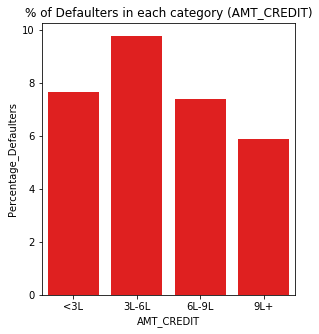

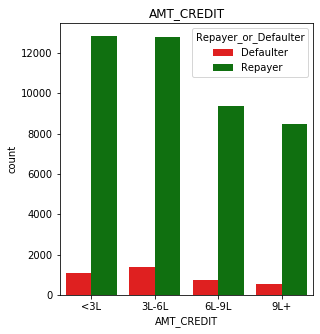

In [102]:
appln_data['AMT_CREDIT']=pd.cut(appln_data['AMT_CREDIT'], [0,300000,600000,900000,99999999999], labels=['<3L', '3L-6L', '6L-9L', '9L+'])
appln_data_univariate_categorical('AMT_CREDIT')

In [ ]:
#Insights:-
#1)Clients who have requested for credit between 3-6 Lakhs have more defaulting rate (>9%)
#2)Clients who have requested for credit more than 9 lakhs have less defaulting rate (<6%)
#3)Others are in the acceptable range

In [ ]:
##PERCENTAGE_ADDRESS_MATCH

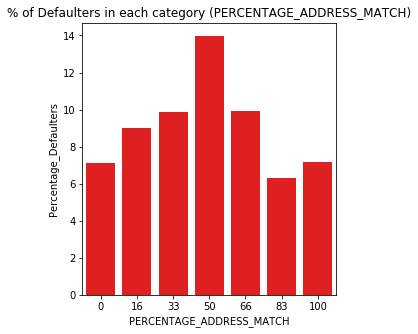

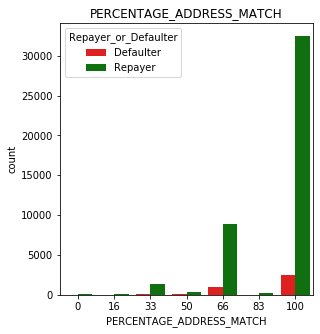

In [103]:
appln_data['PERCENTAGE_ADDRESS_MATCH']=appln_data['PERCENTAGE_ADDRESS_MATCH'].apply(lambda x:int(round(x,1)))
appln_data_univariate_categorical('PERCENTAGE_ADDRESS_MATCH')

In [ ]:
#Insigits:-
#1)Clients whose address match percent <50% have more defaulting rate
#2)Clients whose address match percent is 100% have less defaulting rate (<8%)

In [ ]:
## DAYS_INFO_CHANGED (Registration & ID)

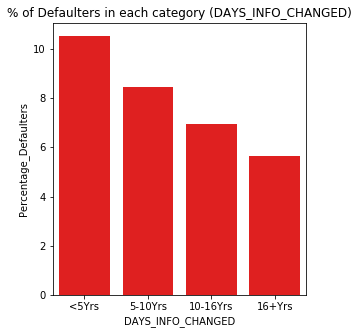

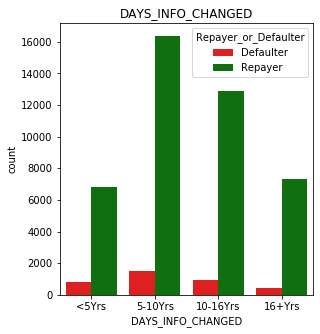

In [104]:
appln_data['DAYS_REGISTRATION']=appln_data['DAYS_REGISTRATION'].apply(lambda x:int(x))
appln_data['DAYS_ID_PUBLISH']=appln_data['DAYS_ID_PUBLISH'].apply(lambda x:int(x*-1))
appln_data['DAYS_INFO_CHANGED']=appln_data[['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].mean(axis=1)
appln_data['DAYS_INFO_CHANGED'].describe()
appln_data['DAYS_INFO_CHANGED']=pd.cut(appln_data['DAYS_INFO_CHANGED'], [0,2000,4000,6000,999999], labels=['<5Yrs', '5-10Yrs', '10-16Yrs', '16+Yrs'])
appln_data_univariate_categorical('DAYS_INFO_CHANGED')

In [ ]:
#Insights:-
#1)Clients who have changed their information <5 years have more defaulting rate
#2)Clients who have changed their information >5 years have less defaulting rate
#3)Clients who have changed their information >16 years age have very less defaulting rate (Less risk asccociated)


In [ ]:
##CNT_FAM_MEMBERS

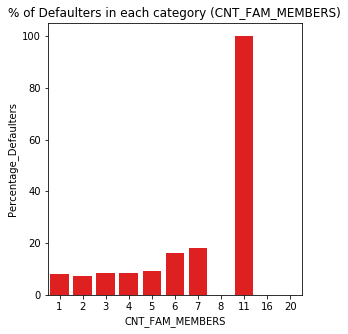

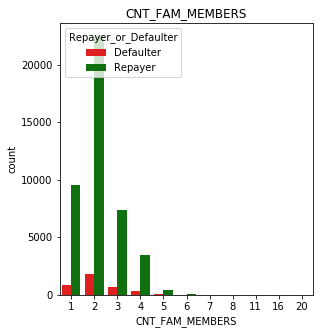

In [105]:
appln_data['CNT_FAM_MEMBERS']=appln_data['CNT_FAM_MEMBERS'].astype(int)
appln_data_univariate_categorical('CNT_FAM_MEMBERS')

In [ ]:
#Insights:-
#Clients having the family members <=5 have lesser defaulting rate


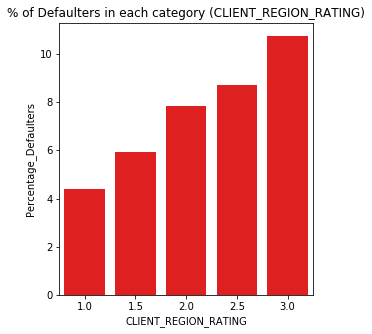

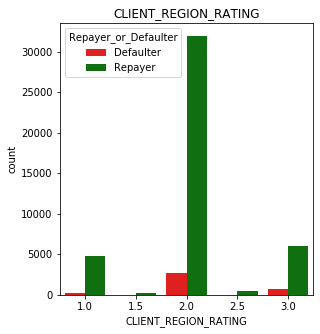

In [106]:
#CLIENT_REGION_RATING (1-3, 1:-Low & 3:-High)
appln_data_univariate_categorical('CLIENT_REGION_RATING')

In [ ]:
#Insights:-
#1)Clients from region that has 3 rating have higher defaulting rate
#2)Clients from region that has <2 rating have lesser defaulting rate
#3)Clients from region that has 2 rating have medium defaulting rate (Acceptable range)


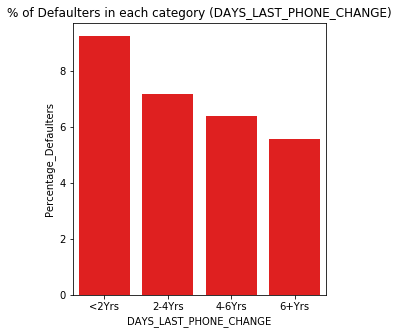

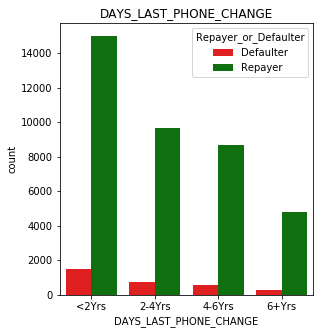

In [107]:
#DAYS_LAST_PHONE_CHANGE
appln_data['DAYS_LAST_PHONE_CHANGE']=pd.cut(appln_data['DAYS_LAST_PHONE_CHANGE'], [0,700,1400,2100,999999], labels=['<2Yrs', '2-4Yrs', '4-6Yrs', '6+Yrs'])
appln_data_univariate_categorical('DAYS_LAST_PHONE_CHANGE')

In [ ]:
#nsights:-
#1)Clients who have changed their phone numbers within 2 years from the date of loan application have higher defaulting rate
#2)Clients who have changed their phone numbers long back (>6 years) have lesser defaulting rate
#3)More the years of last phone change, lesser is the defaulting rate

In [ ]:
##Bivariate Analysis
#target: TARGET column

In [ ]:
#function to call heatmap

In [124]:
def appln_data_heatmap(x,y):
    a=appln_data.pivot_table(index=x,columns=y,values='TARGET_PERCENT')
    sns.heatmap(a, cmap='RdYlGn_r', center=8, annot=True ,cbar_kws={'label': '% of Defaulters'})
    plt.title(x+' vs '+y)
    plt.show()

In [ ]:
#NAME_CONTRACT_TYPE vs CODE_GENDER

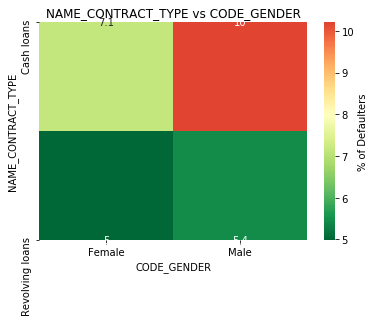

In [125]:
appln_data_heatmap('NAME_CONTRACT_TYPE', 'CODE_GENDER')

In [ ]:
#Insights:-
#1)High defaulting rate under Male - Cash loans category (10%)
#2)Low defaulting rate under Female - Revolving loans category (5%)
#3)Female-Cash loans category are in acceptable range (7.1%)

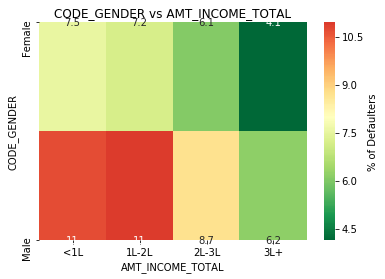

In [126]:
#CODE_GENDER vs AMT_INCOME_TOTAL
appln_data_heatmap('CODE_GENDER', 'AMT_INCOME_TOTAL')

In [ ]:
#Insights:-
#1)Male clients with income <1 Lakh have high defaulting rate (11%)
#2)Female clients with income >3 Lakh have less defaulting rate(4.1%)

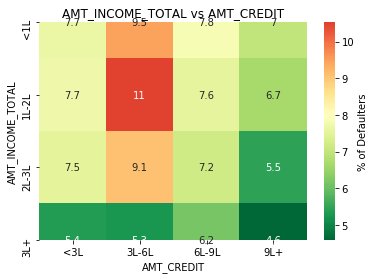

In [127]:
#AMT_INCOME_TOTAL vs AMT_CREDIT
appln_data_heatmap('AMT_INCOME_TOTAL', 'AMT_CREDIT')

In [ ]:
#Insights:-
#1)Clients with less income and credit amount requested higher than their income have high defaulting rate (11%)
#2)Clients with more salary and equivalent credit amount requested have less defaulting rate (5-6%) (Less risk)

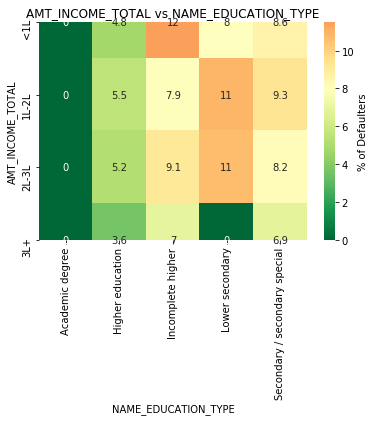

In [128]:
#AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE
appln_data_heatmap('AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE')

In [ ]:
#Insights:-
#1)Clients with Academic degree and Higher education with all income levels have very less defaulting rate
#2)Clients with other education types (with all income levels) have little higher defaulting rate comparatively

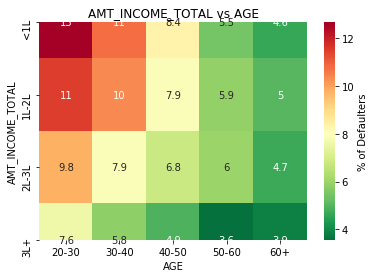

In [130]:
#AMT_INCOME_TOTAL vs AGE
appln_data_heatmap('AMT_INCOME_TOTAL', 'AGE')

In [ ]:
#Insights:-
#1)Young clients whose age is 20-40 with income level <2-3 Lakh have high defaulting rates
#2)Clients whose age is more than 50 with all income levels have less defaulting rate (Less risk)
#3)More the age and more the income, lesser is the defaulting rate

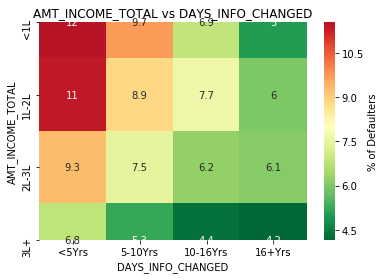

In [131]:
appln_data_heatmap('AMT_INCOME_TOTAL', 'DAYS_INFO_CHANGED')

In [ ]:
# Insights:-
#1)Clients with lower salary and who have changed their documents in <5 years have high defaulting rate
#2)Clients with all levels of salary and who haven't changed their documents from long time (>10 years) have lesser defaulting rate (less risk associated)

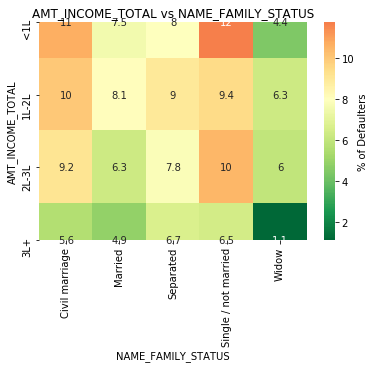

In [132]:
appln_data_heatmap('AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS')

In [ ]:
#Insights:-
#1)Widow clients with all types of income levels have less defaulting rate (4-6%)
#2)All types of clients with high income level have average defaulting rate (6-7%)

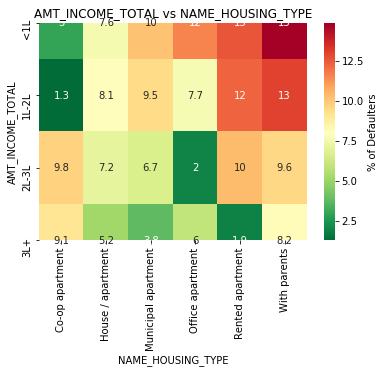

In [133]:
appln_data_heatmap('AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE')

In [ ]:
#Insights:-
#1)Clients with income <2 Lakhs who have either rented apartment or with their parents have very high defaulting rate (10-13%)
#2)Other clients who have owned apartment / office apartments have average defaulting rate (6-8%)
#3)Clients with office apartment or owned house/apartment with high income have very less defaulting rate (3-6%)

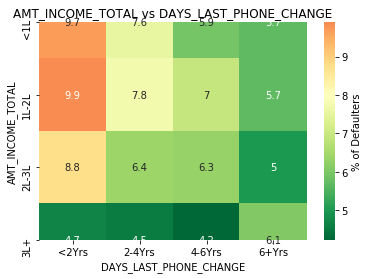

In [134]:
appln_data_heatmap('AMT_INCOME_TOTAL', 'DAYS_LAST_PHONE_CHANGE')

In [ ]:
#Insights
#1)Clients who have changed their phone number in <2-3 years have high defaulting rates
#2)Clients holding their phone number for longer duration (>5-6 years) have less defaulting rate (Less risk associated)

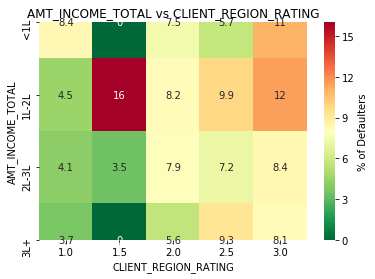

In [135]:
appln_data_heatmap('AMT_INCOME_TOTAL', 'CLIENT_REGION_RATING')

In [ ]:
#Insights:-
#1)Clients whose region rating is <=1 with all levels of income have less defaulting rate
#2)Clients whose region rating is between 1.5-2.5 have acceptable defaulting rate
#3)Clients from region rated with 3 (of all income levels) have high defaulting rates

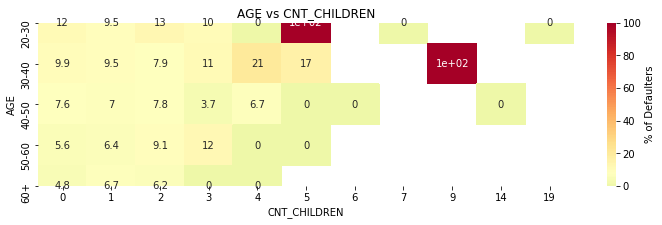

In [136]:
plt.figure(figsize=(12,3))
appln_data_heatmap('AGE', 'CNT_CHILDREN')
plt.show()

In [ ]:
#Insights 
#1)Young Clients with more children have high defaulting rate
#2)Older clients with less children have less defaulting rate (Less risk associated)

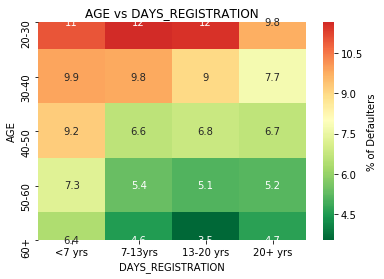

In [137]:
appln_data['DAYS_REGISTRATION']=pd.cut(appln_data['DAYS_REGISTRATION'], [0,2500,5000,7500,99999999], labels=['<7 yrs', '7-13yrs', '13-20 yrs', '20+ yrs'])
appln_data_heatmap('AGE', 'DAYS_REGISTRATION')

In [ ]:
#Insights
#1)Young Clients who have changed their registration within 7-10 years have high defaulting rate
#2)Older clients who have changed their registration 15-20 years ago have less defaulting rate (Less risk associated)

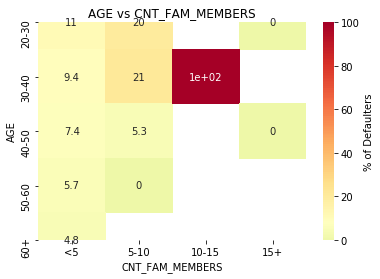

In [138]:
appln_data['CNT_FAM_MEMBERS']=pd.cut(appln_data['CNT_FAM_MEMBERS'], [0,5,10,15,200], labels=['<5', '5-10', '10-15', '15+'])
appln_data_heatmap('AGE', 'CNT_FAM_MEMBERS')

In [ ]:
#Insights 
#1)Mid & older clients with family members <5 have less defaulting rate (Less risk associated)
#2)Others have high defaulting rate or less/no data

In [ ]:
#Previous Applications Data

In [142]:
pre_appln_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
pre_appln_data.shape

(1670214, 37)

In [145]:
pre_appln_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [146]:
pre_appln_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
#Handling Missing Values & Data Sanity Check

In [150]:
pre_appln_data.isna().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
RATE_DOWN_PAYMENT               895844
AMT_DOWN_PAYMENT                895844
NAME_TYPE_SUITE                 820405
DAYS_TERMINATION                673065
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_FIRST_DRAWING              673065
DAYS_FIRST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_LAST_DUE                   673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

In [ ]:
#% of missing values

In [154]:
pre_appln_data.isna().mean().sort_values(ascending=False)*100

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [ ]:
#Dropping Columns with Missing Values >40%

In [155]:
col_null_40_pre_appln_data=pre_appln_data.columns[pre_appln_data.isna().mean()*100>40]
pre_appln_data.drop(columns=col_null_40_pre_appln_data, inplace=True) #Dropped the columns that had the null values >40%

In [156]:
pre_appln_data.isna().mean().sort_values(ascending=False)*100

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_YIELD_GROUP                0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

In [157]:
#Dealing the Null Values of 'AMT_CREDIT' Column 
pre_appln_data=pre_appln_data[~pre_appln_data['AMT_CREDIT'].isna()]

In [ ]:
#Imputing the Null Values of the 'AMT_ANNUITY' Column (22.28% Null values)
#W.r.t the 'AMT_CREDIT' on average or median (here), applicants have Annual 10 installements
#Therefore replacing the null values of 'AMT_ANNUITY' by dividing 'AMT_CREDIT' with 10

In [159]:
annual_installments=int((pre_appln_data['AMT_CREDIT']/pre_appln_data['AMT_ANNUITY']).median())
pre_appln_data['AMT_ANNUITY'].fillna(pre_appln_data['AMT_CREDIT']/annual_installments, inplace=True)

In [ ]:
#Imputing the Null Values of 'AMT_GOODS_PRICE' column (23.08% Null values)
#As 'AMT_APPLICATION' will be based on 'AMT_GOODS_PRICE', filling the null values of 'AMT_GOODS_PRICE' with the values of 'AMT_APPLICATION' column

In [160]:
pre_appln_data['AMT_GOODS_PRICE']=pre_appln_data['AMT_GOODS_PRICE'].fillna(pre_appln_data['AMT_APPLICATION'])

In [ ]:
#Imputing the Null Values of 'CNT_PAYMENT' column (22.28% Null values)
#As 'CNT_PAYMENT' column is about the duration between the application and previous loan credit. If the previous loan status is 'Canceled' or 'Refused' or 'Unused offer', then 'CNT_PAYMENT' will be Zero.

In [161]:
#Checking for the Loan status from 'NAME_CONTRACT_STATUS' column at the null places of 'CNT_PAYMENT' column
pre_appln_data[pre_appln_data['CNT_PAYMENT'].isna()]['NAME_CONTRACT_STATUS'].value_counts() 

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [162]:
# As the 'NAME_CONTRACT_STATUS' are in ['Canceled', 'Refused', 'Unused offer']
# Replacing null values with 0
pre_appln_data['CNT_PAYMENT']=pre_appln_data['CNT_PAYMENT'].fillna(0)

In [ ]:
#Dealing with the Null Values of 'PRODUCT_COMBINATION' column (0.02% Null values)¶
#Dropping the rows that has null values in the column 'PRODUCT_COMBINATION'

In [163]:
pre_appln_data=pre_appln_data[~pre_appln_data['PRODUCT_COMBINATION'].isna()]

In [164]:
#Final Check for the Null Values of all the Columns
pre_appln_data.isna().mean()*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [165]:
pre_appln_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [ ]:
#Univariate & Multivariate Analysis
#Target:- 'NAME_CONTRACT_STATUS'

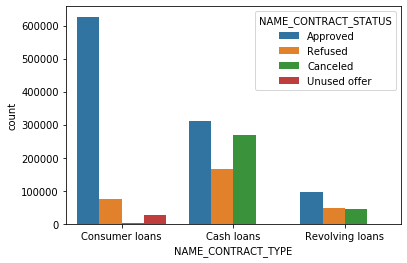

In [166]:
#NAME_CONTRACT_TYPE
sns.countplot(data=pre_appln_data, x=pre_appln_data['NAME_CONTRACT_TYPE'], hue=pre_appln_data['NAME_CONTRACT_STATUS'])
plt.show()

In [ ]:
#Insights:-
#1)More clients are cancelling the loans themselves under cash loans category
#2)Consumer loans has the highest approval rate and lowest cancellations by the clients

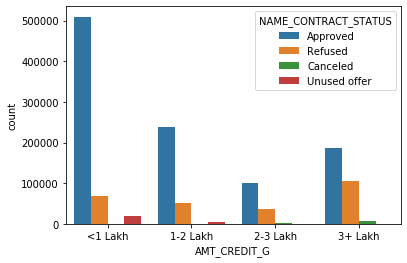

In [167]:
#AMT_CREDIT_G ('AMT_CREDIT' grouped
pre_appln_data['AMT_CREDIT_G']=pd.cut(pre_appln_data['AMT_CREDIT'], [0,100000,200000,300000,9999999999], labels=['<1 Lakh','1-2 Lakh', '2-3 Lakh', '3+ Lakh'])
sns.countplot(data=pre_appln_data, x=pre_appln_data['AMT_CREDIT_G'], hue=pre_appln_data['NAME_CONTRACT_STATUS'])
plt.show()

In [ ]:
#Insights:-
#1)High approval rate for credit amount less than 1 lakh
#2)Less approval rate for credit amount more than 3 lakh

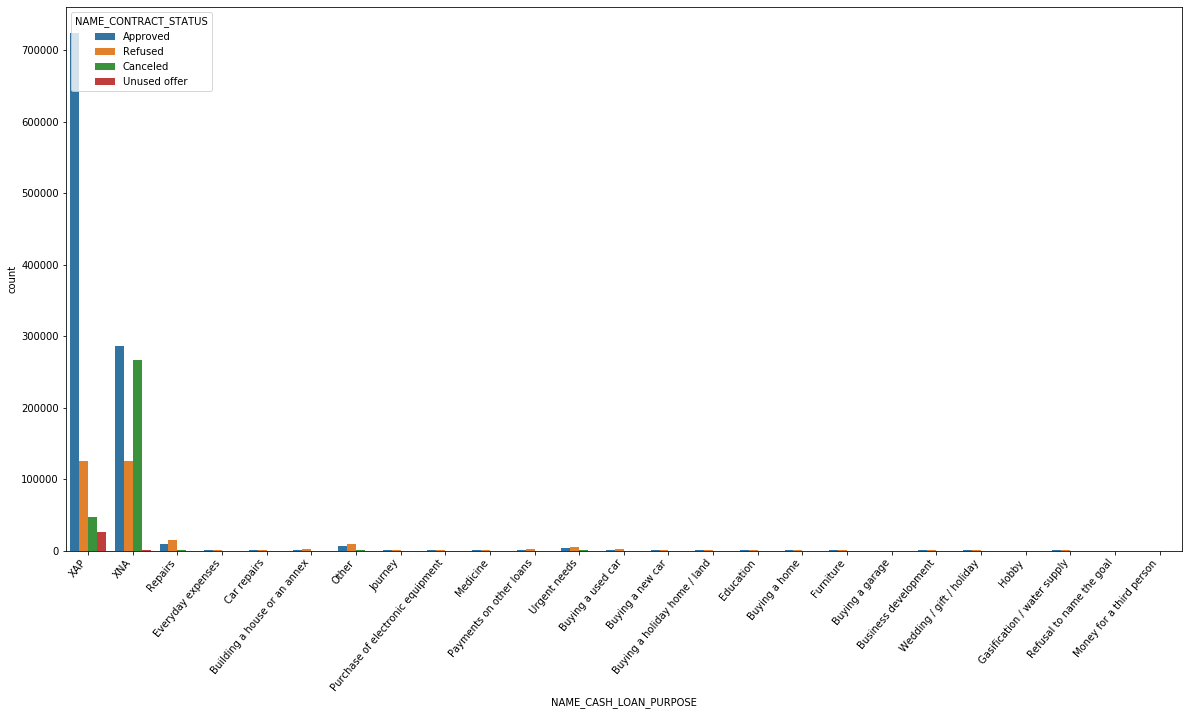

In [168]:
#NAME_CASH_LOAN_PURPOSE
plt.figure(figsize=(20,10))
plot=sns.countplot(data=pre_appln_data, x=pre_appln_data['NAME_CASH_LOAN_PURPOSE'], hue=pre_appln_data['NAME_CONTRACT_STATUS'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=50, horizontalalignment='right')
plt.show()

In [ ]:
#Insights:-
#Since majority of the values are XAP & XNA, not much useful insight was seen from this plot

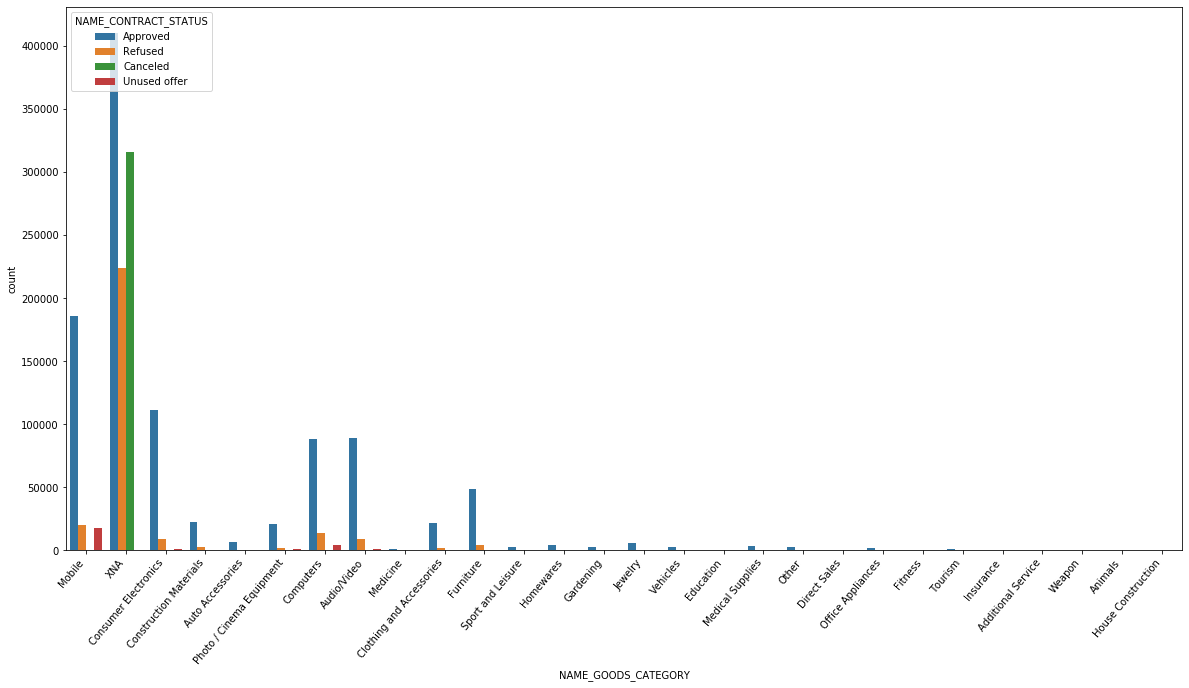

In [169]:
#NAME_GOODS_CATEGORY
plt.figure(figsize=(20,10))
plot=sns.countplot(data=pre_appln_data, x=pre_appln_data['NAME_GOODS_CATEGORY'], hue=pre_appln_data['NAME_CONTRACT_STATUS'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=50, horizontalalignment='right')
plt.show()

In [ ]:
#Insights:-
#1)High approval rate can be expected for goods of mobile, consumer electronics, computers, clothing and furnitures, construction materials (Estimated based on the quantity of the data available)
#2)Again most of the data are XNA here

In [ ]:
#Merge the data

In [170]:
merged_appln_data_pre_appln_data=appln_data.merge(pre_appln_data,how='inner',on='SK_ID_CURR')

In [172]:
merged_appln_data_pre_appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_CREDIT_G
0,100002,1,Cash loans,Male,No,Yes,0,2L-3L,3L-6L,24700.5,...,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,1-2 Lakh
1,100003,0,Cash loans,Female,No,No,0,2L-3L,9L+,35698.5,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,3+ Lakh
2,100003,0,Cash loans,Female,No,No,0,2L-3L,9L+,35698.5,...,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,3+ Lakh
3,100003,0,Cash loans,Female,No,No,0,2L-3L,9L+,35698.5,...,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,<1 Lakh
4,100004,0,Revolving loans,Male,Yes,Yes,0,<1L,<3L,6750.0,...,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,<1 Lakh


In [174]:
merged_appln_data_pre_appln_data.shape

(213341, 120)

In [175]:
merged_appln_data_pre_appln_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213341 entries, 0 to 213340
Columns: 120 entries, SK_ID_CURR to AMT_CREDIT_G
dtypes: category(8), float64(46), int64(34), object(32)
memory usage: 185.6+ MB


In [176]:
merged_appln_data_pre_appln_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,HOUR_APPR_PROCESS_START_x,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,213341.000000,213341.000000,213341.000000,213341.000000,2.133410e+05,213341.000000,213341.000000,213341.000000,196525.000000,213341.000000,...,2.133410e+05,213341.000000,2.133410e+05,2.133410e+05,2.133410e+05,213341.000000,213341.000000,213341.000000,2.133410e+05,213341.000000
mean,428878.590974,0.085605,0.400073,27031.732107,5.288645e+05,0.020853,68415.173492,3029.346694,12.118875,11.973742,...,1.921656e+06,12561.068957,1.746405e+05,1.954150e+05,1.746472e+05,12.473786,0.996269,-884.307742,3.222445e+02,12.488195
std,19443.192047,0.279780,0.712374,13938.301299,3.536244e+05,0.013392,145041.959025,1504.963137,12.028389,3.238936,...,5.328669e+05,14523.284238,2.920416e+05,3.176149e+05,2.920477e+05,3.322281,0.060969,783.899582,8.826104e+03,14.411968
min,100002.000000,0.000000,0.000000,1615.500000,4.050000e+04,0.000290,-17912.000000,0.000000,0.000000,0.000000,...,1.000024e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-2922.000000,-1.000000e+00,0.000000
25%,417284.000000,0.000000,0.000000,16852.500000,2.385000e+05,0.010032,-2795.000000,1789.000000,5.000000,10.000000,...,1.460523e+06,3095.145000,1.961550e+04,2.472750e+04,1.961550e+04,10.000000,1.000000,-1322.000000,-1.000000e+00,0.000000
50%,429307.000000,0.000000,0.000000,24939.000000,4.500000e+05,0.018850,-1275.000000,3315.000000,9.000000,12.000000,...,1.920821e+06,8436.105000,7.034445e+04,8.033400e+04,7.037100e+04,12.000000,1.000000,-585.000000,4.000000e+00,10.000000
75%,442823.000000,0.000000,1.000000,34474.500000,6.795000e+05,0.028663,-286.000000,4309.000000,15.000000,14.000000,...,2.382697e+06,16780.005000,1.800000e+05,2.129895e+05,1.800000e+05,15.000000,1.000000,-272.000000,8.400000e+01,16.000000
max,456255.000000,1.000000,19.000000,216589.500000,3.375000e+06,0.072508,365243.000000,6227.000000,91.000000,23.000000,...,2.845369e+06,309942.000000,3.771000e+06,4.104351e+06,3.771000e+06,23.000000,1.000000,-1.000000,4.000000e+06,84.000000


In [ ]:
#AMT_INCOME_TOTAL vs NAME_CONTRACT_STATUS (Target:- 'TARGET')

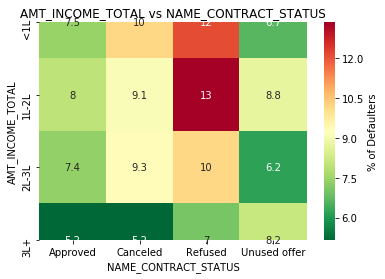

In [178]:
pivot=merged_appln_data_pre_appln_data.pivot_table(index='AMT_INCOME_TOTAL', columns='NAME_CONTRACT_STATUS', values='TARGET_PERCENT')
sns.heatmap(data=pivot, cmap='RdYlGn_r', annot=True, cbar_kws={'label':'% of Defaulters'})
plt.title('AMT_INCOME_TOTAL vs NAME_CONTRACT_STATUS')
plt.show()

In [ ]:
#Insights:-
#1)More defaulters have total income <1.75 Lakh who were rejected before
#2)Previously Rejected clients with income level less than 3 Lakh have high defaulting rate (>11%)
#3)Previously Approved clients with almost all income level have less defaulting rate (<7.5%)